# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [2]:
data_stops = pd.read_csv('data/uni_molde_v3.csv', sep=';')

data_stops
data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date', 'location_is_depot']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'location_is_depot': x['location_is_depot'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df
# grouped_df

stop_completed_at         0
stop_arrived_at           0
stop_latest               0
stop_earliest             0
stop_dispatched_at        0
location_id               0
location_type_id          0
driver_workday_id         0
address_id                0
location_is_depot         0
driver_id                 0
current_lat               0
current_lng               0
prev_planned_lat      27440
prev_planned_lng      27440
prev_actual_lat       27440
prev_actual_lng       27440
dtype: int64
number of groups 11589


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, False]","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False, Fals...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[True, False, False, False, False, False

In [3]:
sorted_data_stops.head()

,stop_completed_at,stop_arrived_at,stop_latest,stop_earliest,stop_dispatched_at,location_id,location_type_id,driver_workday_id,address_id,location_is_depot,...,current_lat,current_lng,prev_planned_lat,prev_planned_lng,prev_actual_lat,prev_actual_lng,day_of_week,date,cluster,location_id_craft
0,2024-01-02 11:10:52.185782+00,2024-01-02 11:10:51.209288+00,2024-01-02 22:59:00+00,2024-01-02 05:00:00+00,2023-12-20 09:20:12.139397+00,104448,1,299448,80079,False,...,56.455617,10.051820,NaN,NaN,NaN,NaN,Wednesday,2023-12-20,337,4134
1,2024-01-02 11:10:52.185783+00,2024-01-02 11:10:51.209289+00,2024-01-02 22:59:00+00,2024-01-02 05:00:00+00,2023-12-20 09:20:12.144071+00,86931,2,299448,81843,False,...,59.473000,10.318318,56.455617,10.051820,56.455617,10.051820,Wednesday,2023-12-20,48,5561
2,2024-01-02 11:10:52.178147+00,2024-01-02 11:10:51.03874+00,2024-01-02 21:00:00+00,2024-01-02 05:00:00+00,2023-12-20 09:21:01.657773+00,86931,1,299447,81843,False,...,59.473000,10.318318,NaN,NaN,NaN,NaN,Wednesday,2023-12-20,48,5561
3,2024-01-02 11:10:52.178148+00,2024-01-02 11:10:51.038741+00,2024-01-02 21:00:00+00,2024-01-02 05:00:00+00,2023-12-20 09:21:01.661233+00,148025,2,299447,134404,False,...,58.783764,5.734901,59.473000,10.318318,59.473000,10.318318,Wednesday,2023-12-20,520,4265
4,2024-01-02 08:39:35.128145+00,2024-01-02 07:45:25.310456+00,2024-01-02 21:00:00+00,2024-01-02 05:00:00+00,2023-12-20 09:22:29.569837+00,86931,1,299444,81843,False,...,59.473000,10.318318,NaN,NaN,NaN,NaN,Wednesday,2023-12-20,48,5561


In [2]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
# grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)
# grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)
# total_sum_distance = grouped_df['distance_route'].sum()
# grouped_df['total_distance'] = total_sum_distance

In [5]:
# indexes_to_drop = grouped_df[grouped_df['driver_id'].apply(lambda x: len(x) == 1)].index
#
# grouped_df = grouped_df.drop(indexes_to_drop)
#
# # Step 3: Reset the index
# grouped_df = grouped_df.reset_index(drop=True)

In [4]:
# grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
# grouped_df

routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)
len(routes)

20692

In [6]:
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)
#
print(len(routes))

The number of routes where one value is NA(arrived time) 0
[]
20669


In [7]:
#check if it is the same driver in the route
def get_mode(x):
    return pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan

for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(get_mode)
routes['date'] = routes['date'].apply(get_mode)

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2023-12-21') | (routes['date'] > '2024-01-14')]
routes['location_type_id'] = routes['location_type_id'].apply(lambda x: [0 if i == 1 else 1 for i in x])
routes['location_is_depot'] = routes['location_is_depot'].apply(lambda x: [int(value) for value in x])

routes = routes[routes['planned_route_location'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)

In [8]:
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,last_two_weeks_count
0,305735,1255,"[0, 1, 1, 1, 1, 1, 1, 1]","[153184, 118973, 118820, 119089, 118814, 11909...","[2024-01-15 20:13:10.25734+00, 2024-01-15 20:1...","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...","[2024-01-15 22:14:55.135437+00, 2024-01-15 23:...","[5, 777, 728, 281, 281, 281, 281, 405]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",Monday,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,8
1,305741,1195,"[0, 1, 1, 1, 1, 1, 1, 1]","[153184, 120295, 133280, 120297, 118930, 11893...","[2024-01-15 20:14:10.430711+00, 2024-01-15 20:...","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...","[2024-01-15 22:59:10.867219+00, 2024-01-15 23:...","[5, 676, 676, 676, 883, 883, 883, 676]","[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]",Monday,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,11
2,305742,1186,"[0, 1, 1, 1, 1, 1, 1]","[153184, 118945, 119107, 119964, 126319, 12031...","[2024-01-15 20:15:12.147596+00, 2024-01-15 20:...","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.7498333, 55.80148, 55.7...","[12.15372974969827, 12.5870785, 12.525814, 12....","[2024-01-15 22:32:54.670991+00, 2024-01-15 23:...","[5, 960, 107, 948, 189, 40, 922]","[1167, 2231, 2406, 2349, 2298, 2588, 2493]",Monday,"[1, 0, 0, 0, 0, 0, 0]",2024-01-15,9
3,305754,1218,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 118858, 119855, 118805, 119069, 11879...","[2024-01-15 20:17:12.871538+00, 2024-01-15 20:...","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.646535, 55.672309, 55.6...","[12.15372974969827, 12.539958, 12.588959, 12.6...","[2024-01-15 22:37:19.03627+00, 2024-01-16 00:2...","[5, 405, 600, 266, 139, 472, 286, 564, 579, 923]","[1167, 1168, 1495, 1658, 1070, 818, 965, 936, ...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,11
4,305758,1192,"[0, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 118509, 144815, 119179, 118785, 11928...","[2024-01-15 20:17:36.851051+00, 2024-01-15 20:...","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.640375, 55.639120600000...","[12.15372974969827, 12.091312, 12.0627714, 12....","[2024-01-15 23:06:46.892607+00, 2024-01-16 01:...","[5, 116, 443, 116, 587, 116, 800, 434, 5]","[1167, 1101, 1079, 1282, 1123, 1098, 834, 1262...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,442390,276,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[23977, 46865, 149896, 24638, 42874, 136813, 3...","[2024-08-06 19:39:14.014177+00, 2024-08-06 19:...","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....","[2024-08-07 13:31:52.955952+00, 2024-08-07 13:...","[422, 422, 835, 459, 459, 924, 278, 839, 847, ...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",Tuesday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-08-06,1
18558,

In [9]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

def create_actual_route_type(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row['location_type_id'][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['actual_route_type'] = create_actual_route_type(routes, 'planned_route_craft')
# routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
# routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
# routes['difference_distance'] = (routes['total_distance_actual'] - routes['total_distance_planned'])/routes['total_distance_planned']

#remove all the routes with length <= 2
routes = routes[routes['planned_route_location'].apply(lambda x: len(x) > 2)]
routes = routes.reset_index(drop=True)
# routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
# routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
len(routes)

18562

In [10]:
routes = routes.reset_index(drop=True)
more_than_one_1 = routes[routes['location_is_depot'].apply(lambda x: x.count(True) > 1)]
len(more_than_one_1), len(routes)

# more_than_one_1_2 = more_than_one_1[more_than_one_1['location_type_id'].apply(lambda x: x[0] != 1)]
#
# more_than_one_1_2
more_than_one_1

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,location_is_depot,date,last_two_weeks_count,actual_route_location,actual_route_type
7,305777,1184,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 149629, 153184, 133530, 126197, 12617...","[2024-01-15 01:00:55.998747+00, 2024-01-15 01:...","[2024-01-15 02:30:31.162054+00, 2024-01-15 03:...","[2024-01-15 00:00:00+00, 2024-01-15 02:00:00+0...","[2024-01-15 05:00:00+00, 2024-01-15 05:00:00+0...","[55.64641920439919, 55.32612200000001, 55.6464...","[12.15372974969827, 11.9560479, 12.15372974969...","[2024-01-15 02:30:39.234141+00, 2024-01-15 03:...","[5, 114, 5, 544, 349, 79, 79, 239, 76, 856, 20...","[1167, 574, 1167, 523, 473, 462, 444, 400, 190...",Monday,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,8,"[1167, 1167, 574, 523, 473, 462, 444, 400, 190...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
11,305822,1222,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[153184, 153184, 126299, 133416, 133416, 12722...","[2024-01-15 20:18:10.752813+00, 2024-01-15 20:...","[2024-01-15 22:32:59.762652+00, 2024-01-15 22:...","[2024-01-15 19:00:00+00, 2024-01-15 19:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 01:00:00+0...","[55.64641920439919, 55.64641920439919, 55.7084...","[12.15372974969827, 12.15372974969827, 12.5917...","[2024-01-15 22:33:08.599355+00, 2024-01-15 22:...","[5, 5, 427, 427, 427, 427, 181, 448, 409, 267,...","[1167, 1167, 1905, 1914, 1914, 1912, 2084, 215...",Monday,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,8,"[1167, 1167, 2158, 2094, 2152, 2093, 2084, 191...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
13,306381,1190,"[0, 1, 1, 0, 1]","[153184, 118473, 118476, 144329, 153184]","[2024-01-23 10:42:01.731+00, 2024-01-23 10:42:...","[2024-01-23 10:49:20.166468+00, 2024-01-23 10:...","[2024-01-16 00:00:00+00, 2024-01-16 05:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 11:00:00+0...","[55.64641920439919, 55.6487125, 55.6163424, 55...","[12.15372974969827, 12.1307559, 12.3275461, 12...","[2024-01-23 10:49:20.166469+00, 2024-01-23 10:...","[5, 434, 828, 516, 5]","[1167, 1194, 947, 1797, 1167]",Tuesday,"[1, 0, 0, 0, 1]",2024-01-23,2,"[1167, 1194, 947, 1797, 1167]","[0, 1, 1, 0, 1]"
22,306394,1193,"[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]","[153184, 119965, 118462, 118782, 153184, 12626...","[2024-01-15 23:57:51.582139+00, 2024-01-15 23:...","[2024-01-16 02:56:53.195248+00, 2024-01-16 04:...","[2024-01-16 00:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 06:00:00+0...","[55.64641920439919, 55.680064, 55.67597, 55.67...","[12.15372974969827, 12.591503, 12.559307, 12.5...","[2024-01-16 09:19:36.924514+00, 2024-01-16 09:...","[5, 600, 728, 11, 5, 434, 5, 593, 116, 116, 58...","[1167, 1646, 1562, 1614, 1167, 1254, 1167, 217...",Tuesday,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]",2024-01-16,2,"[1167, 1646, 1614, 1562, 1167, 1254, 1167, 228...","[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]"
24,306396,1208,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[153184, 118551, 120151, 118602, 118569, 11904...","[2024-01-15 23:32:24.727186+00, 2024-01-15 23:...","[2024-01-16 03:16:27.520502+00, 2024-01-16 03:...","[2024-01-16 00:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-16 22:00:00+00, 2024-01-16 06:00:00+0...","[55.64641920439919, 55.659909, 55.667373, 55.6...","[12.15372974969827, 12.299289, 12.438708, 12.3...","[2024-01-16 03:16:44.779308+00, 2024-01-16 03:...","[5, 806, 588, 883, 350, 451, 883, 754, 588, 58...","[1167, 1329, 1411, 1732, 1424, 1441, 1508, 130...",Monday,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2024-01-15,8,"[1167, 1329, 1472, 1424, 1441, 1732, 1411, 152...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18551,442354,290,"[0, 1, 1,

In [12]:
routes['difference_distance'] = routes['total_distance_actual'] - routes['total_distance_planned']

KeyError: 'total_distance_actual'

In [11]:
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'location_is_depot', 'date']]
actual_routes = routes['actual_route_location']

In [12]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(18562, 18562)

# Edit distance

In [13]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

print(minDistance([878, 1526, 1613, 1706, 1857, 1777], [878, 1526, 1706, 1613, 1777, 1857]))

3


# Route quality score

In [14]:
def calculate_route_quality_score(planned_ranks, actual_ranks):
    # Calculate sum of absolute differences in ranks
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)

    # Calculate max possible difference
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])

    # Calculate route quality score
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)

    return route_quality_score

For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [15]:
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'score', 'location_is_depot', 'date'])
#11700795
for i in range(len(planned_routes_list)):
    # editDistance = minDistance(planned_routes_list[i],actual_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i],actual_routes_list[i])
    completed_routes_df = pd.concat([completed_routes_df, pd.DataFrame([planned_routes.iloc[i]]).assign(score=score).reset_index(drop=True)], ignore_index=True)


print(len(completed_routes_df))
# completed_routes_df
completed_routes_df

ValueError: 5 is not in list

In [16]:
drivers_dic = {}
k = 1
for driver in completed_routes_df['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in completed_routes_df['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
completed_routes_df['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
completed_routes_df

Total number of drivers 395


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,score,location_is_depot,date,driver_id_sorted
0,"[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,Monday,8,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",1.000000,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,1
1,"[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",0.875000,"[1, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,2
2,"[1167, 2231, 2406, 2349, 2298, 2588, 2493]","[1167, 2231, 2349, 2406, 2298, 2493, 2588]",1186,Monday,9,"[0, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.7498333, 55.80148, 55.7...","[12.15372974969827, 12.5870785, 12.525814, 12....",0.833333,"[1, 0, 0, 0, 0, 0, 0]",2024-01-15,3
3,"[1167, 1168, 1495, 1658, 1070, 818, 965, 936, ...","[1167, 1070, 936, 822, 963, 965, 818, 1658, 14...",1218,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.646535, 55.672309, 55.6...","[12.15372974969827, 12.539958, 12.588959, 12.6...",0.240000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,4
4,"[1167, 1101, 1079, 1282, 1123, 1098, 834, 1262...","[1167, 1098, 1315, 1282, 1262, 834, 1123, 1079...",1192,Monday,11,"[0, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[55.64641920439919, 55.640375, 55.639120600000...","[12.15372974969827, 12.091312, 12.0627714, 12....",0.300000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",2024-01-15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:52.955936+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-08-06,192
18558,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,Tuesday,2,"[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...",0.976190,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2024-08-06,331
18559,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,Tuesday,1,"[0, 1, 1, 1, 1, 1, 1]","[2024-08-07 13:31:50.711864+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 59.923836, 59.93422, 59.811373, 59...","[11.047135, 10.814451, 10.800594, 10.80755, 10...",1.000000,"[1, 0, 0, 0, 0, 0, 0]",2024-08-06,168
1856

In [17]:
sunday_count = completed_routes_df[completed_routes_df["day_of_week"] == "Sunday"].shape[0]
print(f"Number of rows on Sunday: {sunday_count}")

Number of rows on Sunday: 1804


In [18]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [19]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() ,
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist(),
    'day_of_week': completed_routes_df['day_of_week'].tolist(),
    'score': completed_routes_df['score'].tolist(),
    'location_is_depot': completed_routes_df['location_is_depot'].tolist(),
    'location_type_id': completed_routes_df['location_type_id'].tolist(),
    # 'distance_route': completed_routes_df['distance_route'].tolist(),
    'current_lat': completed_routes_df['current_lat'].tolist(),
    'current_lng': completed_routes_df['current_lng'].tolist(),
    'date': completed_routes_df['date'].tolist(),
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,actual_routes,driver_id,last_two_weeks_count,day_of_week,score,location_is_depot,location_type_id,current_lat,current_lng,date,len
0,"[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255,8,Monday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",2024-01-15,8
1,"[1167, 1352, 1312, 1356, 1508, 1508, 1621, 1401]","[1167, 1312, 1356, 1352, 1508, 1508, 1621, 1401]",1195,11,Monday,0.875000,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.662018, 55.658103, 55.6...","[12.15372974969827, 12.360745, 12.368506, 12.3...",2024-01-15,8
2,"[1167, 2231, 2406, 2349, 2298, 2588, 2493]","[1167, 2231, 2349, 2406, 2298, 2493, 2588]",1186,9,Monday,0.833333,"[1, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.7498333, 55.80148, 55.7...","[12.15372974969827, 12.5870785, 12.525814, 12....",2024-01-15,7
3,"[1167, 1168, 1495, 1658, 1070, 818, 965, 936, ...","[1167, 1070, 936, 822, 963, 965, 818, 1658, 14...",1218,11,Monday,0.240000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.646535, 55.672309, 55.6...","[12.15372974969827, 12.539958, 12.588959, 12.6...",2024-01-15,10
4,"[1167, 1101, 1079, 1282, 1123, 1098, 834, 1262...","[1167, 1098, 1315, 1282, 1262, 834, 1123, 1079...",1192,11,Monday,0.300000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.640375, 55.639120600000...","[12.15372974969827, 12.091312, 12.0627714, 12....",2024-01-15,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18557,"[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...","[10076, 10099, 9596, 9507, 9158, 8853, 9640, 8...",276,1,Tuesday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[60.007627, 60.01175632293701, 59.950832, 59.9...","[11.047135, 11.052440556594831, 10.856852, 10....",2024-08-06,15
18558,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,2,Tuesday,0.976190,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...",2024-08-06,13
18559,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,1,Tuesday,1.000000,"[1, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1]","[60.007627, 59.923836, 59.93422, 59.811373, 59...","[11.047135, 10.814451, 10.800594, 10.80755, 10...",2024-08-06,7
18560,"[7166, 7127, 7166, 9527]","[7166, 7166, 7127, 9527]",1417,1,Wednesday,0.875000,"[1, 0, 1, 0]","[0, 1, 0, 1]","[59.805664, 59.795058, 59.805664, 59.948098894...","[10.290383, 10.279009, 10.290383, 10.771520299...",2024-08-07,4


In [20]:
def determine_country(lat, lng):
    if 57.5 <= lat <= 71.2 and 4.0 <= lng <= 31.0:
        return 0  # Norway
    elif 54.5 <= lat <= 57.8 and 8.0 <= lng <= 15.0:
        return 1  # Denmark
    else:
        return 1
final_routes['country_flag'] = final_routes.apply(lambda row: determine_country(row['current_lat'][0], row['current_lng'][0]), axis=1)

max([len(i) for i in final_routes['routes']])

36

In [21]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1
k = 1
print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


10704


In [22]:
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
final_routes['day_of_week_encoded'] = pd.Categorical(final_routes['day_of_week']).codes+1

def encode_day_of_week(row):
    a = np.zeros((36, 7), dtype=int)
    route_len = row['len']
    day_encoded = row['day_of_week_encoded']
    for i in range(36 - route_len, len(a)):
        a[i][day_encoded-1] = 1
    return a

def encode_day_of_week_simple(row):
    a = np.zeros(7, dtype=int)
    day_encoded = row['day_of_week_encoded']
    a[day_encoded - 1] = 1
    return a

final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)
final_routes['country_flag_feature'] = final_routes.apply(lambda x: x['len'] * [x['country_flag']], axis = 1)
final_routes['day_of_week_feature'] = final_routes.apply(encode_day_of_week, axis = 1)
final_routes['day_of_week_encoded_ext'] = final_routes.apply(encode_day_of_week_simple, axis = 1)

encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes

print('correlation', final_routes['len'].corr(final_routes['score']))
print('correlation', max(final_routes['len']))
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)

Total number of drivers 395
correlation -0.13121186778744828
correlation 36


In [23]:
final_routes = final_routes.sort_values(by='date', ascending=True)
final_routes['score_cumulative_avg'] = final_routes.groupby(['driver_id_sorted', 'day_of_week'])['score'].transform(
        lambda x: x.expanding().mean()
    )
final_routes['score_cumulative_driver'] = final_routes.groupby(['driver_id_sorted'])['score'].transform(
        lambda x: x.expanding().mean()
    )

# Average benchmark here

In [ ]:
# result = final_routes.groupby('driver_id_sorted')[['driver_id_sorted', 'score']].apply(
#     lambda x: pd.Series({'count': len(x), 'score': x['score'].tolist()})
# ).reset_index()
#
# sorted_result = result.sort_values(by='count', ascending=False).reset_index(drop=True)


1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
2
1
1
1
2
1
2
1
1
1
2
1
1
2
1
2
1
1
1
2
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
1
2
1
2
1
2
1
2
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
2
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
2
1
1
2
1
2
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
2
1
2
1
1
2
1
1
2
1
1
1
2
1
2
1
2
1
2
1
2
1
2
1
1
2
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
1
2
1
2
1
2
1
2
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
2
1
2
1
2
1
2
1
1
1
2
1
2
1
2
1
2
1
2
1
1
1
1
2
1
1
2
1
2
Validation Set Metrics:
MSE: 0.0282
RMSE: 0.1679
MAE: 0.1215
R2: 0.1705

Test Set Metrics:
MSE: 0.0339
RMSE: 0.1841
MAE: 0.1349
R2: 0.0377


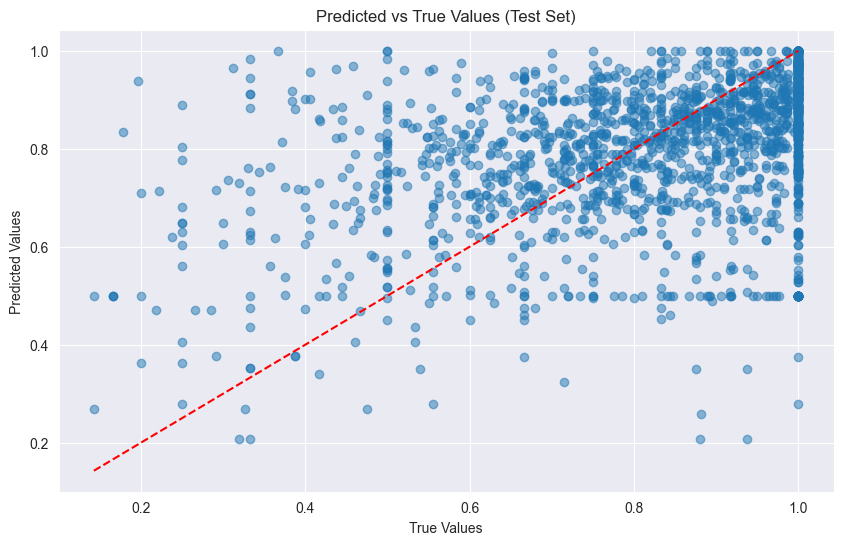

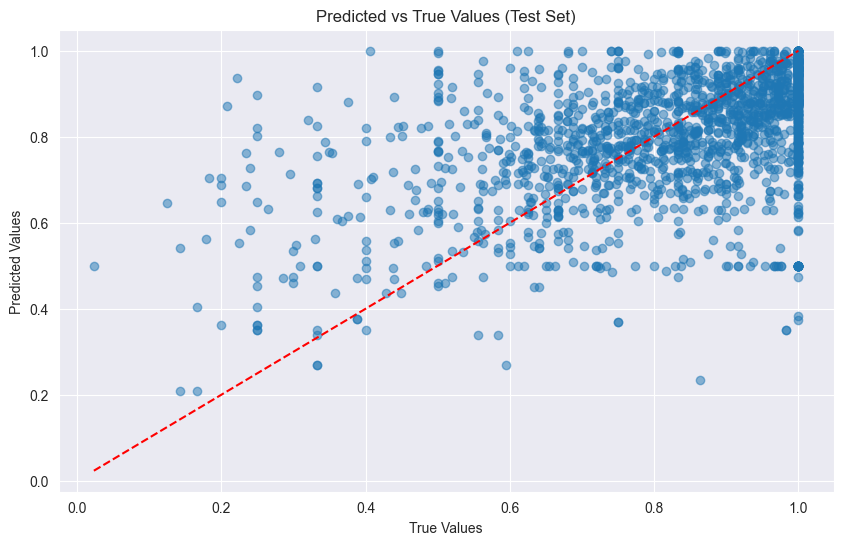

In [26]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate the split indices
total_rows = len(final_routes)
train_end = int(total_rows * 0.8)
val_end = int(total_rows * 0.9)

# Split the data
train_df = final_routes.iloc[:train_end]
val_df = final_routes.iloc[train_end:val_end]
test_df = final_routes.iloc[val_end:]

def get_predictions(df, scores_dict, driver_scores_dict):
    def predict(row):
        # Try to get the score from the main dictionary
        score = scores_dict.get((row['driver_id_sorted'], row['day_of_week']))

        # If not found, fall back to the driver-only dictionary
        if score is None:
            score = driver_scores_dict.get(row['driver_id_sorted'])
            print('1')

        if score is None:
            print('2')
            return 0.5
        else:
            return score

    return df.apply(predict, axis=1)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Calculate metrics for validation set
val_y_true = val_df['score']
average_scores_dict = train_df.groupby(['driver_id_sorted', 'day_of_week'])['score_cumulative_avg'].last().to_dict()
average_scores_dict_driver = train_df.groupby(['driver_id_sorted'])['score_cumulative_driver'].last().to_dict()
val_y_pred = get_predictions(val_df, average_scores_dict, average_scores_dict_driver)
val_mse, val_rmse, val_mae, val_r2 = calculate_metrics(val_y_true, val_y_pred)

# # Calculate metrics for test set
test_y_true = test_df['score']
test_y_pred = get_predictions(test_df, average_scores_dict, average_scores_dict_driver)
test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(test_y_true, test_y_pred)

# Print the metrics
print("Validation Set Metrics:")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R2: {val_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2: {test_r2:.4f}")

# Visualization: Predicted vs True Values for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(test_y_true, test_y_pred, alpha=0.5)
plt.plot([test_y_true.min(), test_y_true.max()], [test_y_true.min(), test_y_true.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (Test Set)')
plt.show()

# Visualization: Predicted vs True Values for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(val_y_true, val_y_pred, alpha=0.5)
plt.plot([val_y_true.min(), val_y_true.max()], [val_y_true.min(), val_y_true.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (Test Set)')
plt.show()


In [27]:
def split_group(group):
    n = len(group)
    if n < 4:  # Ensure at least 1 sample for train and 2 each for val and test
        return pd.DataFrame()

    # Calculate sizes for each split
    train_size = max(int(n * 0.8), n - 4)  # Ensure at least 2 samples each for val and test
    val_test_size = n - train_size
    val_size = val_test_size // 2
    test_size = val_test_size - val_size

    return pd.concat([
        group.iloc[:train_size].assign(split='train'),
        group.iloc[train_size:train_size+val_size].assign(split='val'),
        group.iloc[train_size+val_size:].assign(split='test')
    ])


final_routes_split = final_routes.groupby(['driver_id_sorted', 'day_of_week']).apply(split_group).reset_index(drop=True)
# Separate into train, validation, and test sets
print(len(final_routes_split))
train_df = final_routes_split[final_routes_split['split'] == 'train'].drop('split', axis=1)
val_df = final_routes_split[final_routes_split['split'] == 'val'].drop('split', axis=1)
test_df = final_routes_split[final_routes_split['split'] == 'test'].drop('split', axis=1)

print(len(train_df), len(val_df), len(test_df))
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
combined_df = combined_df.reset_index(drop=True)

val_y_true = val_df['score']
average_scores_dict = train_df.groupby(['driver_id_sorted', 'day_of_week'])['score_cumulative_avg'].last().to_dict()
average_scores_dict_driver = train_df.groupby(['driver_id_sorted'])['score_cumulative_driver'].last().to_dict()
val_y_pred = get_predictions(val_df, average_scores_dict, average_scores_dict_driver)
val_mse, val_rmse, val_mae, val_r2 = calculate_metrics(val_y_true, val_y_pred)


# Calculate metrics for test set
test_y_true = test_df['score']
test_y_pred = get_predictions(test_df, average_scores_dict, average_scores_dict_driver)
test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(test_y_true, test_y_pred)

# Print results
print("Validation Metrics:")
print(f"MSE: {val_mse}, RMSE: {val_rmse}, MAE: {val_mae}, R2: {val_r2}")
print("\nTest Metrics:")
print(f"MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}")


17354
13555 1632 2167
Validation Metrics:
MSE: 0.02325216523659673, RMSE: 0.15248660674497524, MAE: 0.11157097717683447, R2: 0.286823585943052

Test Metrics:
MSE: 0.025284735216898075, RMSE: 0.15901174553125966, MAE: 0.11660545343741194, R2: 0.2195120854192838


/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_72869/4180771597.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_routes_split = final_routes.groupby(['driver_id_sorted', 'day_of_week']).apply(split_group).reset_index(drop=True)


# After benchmark, continue model

In [ ]:
final_routes_split

In [24]:
max(int(5 * 0.8), 5 - 4)

4

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_routes dataframe is available and sorted by date
# If not, make sure to sort it by date first

# Prepare the data
rf_df = final_routes_split[['driver_id_sorted', 'day_of_week_encoded', 'score', 'split']]
o_day_of = pd.get_dummies(rf_df['day_of_week_encoded'], prefix='day')
o_driver = pd.get_dummies(rf_df['driver_id_sorted'], prefix='driver')
rf_df = pd.concat([o_day_of, o_driver, rf_df['split'], rf_df['score']], axis=1)


for col in rf_df.columns:
    if col != 'split' and col != 'score':
        rf_df[col] = rf_df[col].astype(int)

train_df = rf_df[rf_df['split'] == 'train'].drop('split', axis=1)
val_df = rf_df[rf_df['split'] == 'val'].drop('split', axis=1)
test_df = rf_df[rf_df['split'] == 'test'].drop('split', axis=1)

# Create X_train and y_train
X_train = train_df.drop('score', axis=1)
y_train = train_df['score']

# Create X_val and y_val (optional, but often useful)
X_val = val_df.drop('score', axis=1)
y_val = val_df['score']

# Create X_test and y_test (optional, but often useful)
X_test = test_df.drop('score', axis=1)
y_test = test_df['score']

print(len(train_df), len(val_df), len(test_df))
#
#
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Evaluate on validation set
y_val_pred = model.predict(X_val)
val_mse, val_rmse, val_mae, val_r2 = calculate_metrics(y_val, y_val_pred)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(y_test, y_test_pred)

# Print metrics
print("Validation Set Metrics:")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R2: {val_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2: {test_r2:.4f}")



13555 1632 2167
Validation Set Metrics:
MSE: 0.0232
RMSE: 0.1524
MAE: 0.1116
R2: 0.2875

Test Set Metrics:
MSE: 0.0253
RMSE: 0.1589
MAE: 0.1166
R2: 0.2203


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available


class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Training settings
num_epochs = 100
learning_rate = 0.001

model = SimpleNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation loop
best_val_loss = float('inf')
best_model = None

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.state_dict()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_true = y_test_tensor

y_pred = y_pred.numpy()
y_true = y_true.numpy()

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nTest Set Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

Epoch [10/100], Train Loss: 0.6478, Val Loss: 0.6607
Epoch [20/100], Train Loss: 0.4370, Val Loss: 0.4411
Epoch [30/100], Train Loss: 0.2222, Val Loss: 0.2194
Epoch [40/100], Train Loss: 0.0688, Val Loss: 0.0655
Epoch [50/100], Train Loss: 0.0308, Val Loss: 0.0283
Epoch [60/100], Train Loss: 0.0330, Val Loss: 0.0280
Epoch [70/100], Train Loss: 0.0241, Val Loss: 0.0225
Epoch [80/100], Train Loss: 0.0224, Val Loss: 0.0234
Epoch [90/100], Train Loss: 0.0218, Val Loss: 0.0230
Epoch [100/100], Train Loss: 0.0212, Val Loss: 0.0220

Test Set Metrics:
MSE: 0.02352849207818508
RMSE: 0.15339000523090363
MAE: 0.11579161137342453
R2: 0.2737237342466369


In [32]:
# unique_days = final_routes['day_of_week'].unique()
# day_of_week_encoded = pd.get_dummies(final_routes['day_of_week'], prefix='day_of_week')
# final_routes = pd.concat([final_routes, day_of_week_encoded], axis=1)
# final_routes

# Model

In [33]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes_split.drop(columns = ['driver_id', 'len', 'driver_id_sorted','day_of_week_encoded'])
max_route_length = max(len(item) for item in final_routes_split['routes'])
y = np.array(final_routes_split['score'])
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), padding_(X['experience_feature'], max_route_length), padding_(X['len_feature'], max_route_length), padding_(X['driver_id_feature'], max_route_length)], axis=1)
# X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
# final_routes
final_routes_split

,routes,actual_routes,driver_id,last_two_weeks_count,day_of_week,score,location_is_depot,location_type_id,current_lat,current_lng,...,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,country_flag_feature,day_of_week_feature,day_of_week_encoded_ext,score_cumulative_avg,score_cumulative_driver,split
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255.0,8.0,Monday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",1.000000,1.000000,train
1,"[1, 2, 3, 656, 4, 5, 5, 6, 7]","[1167, 1405, 1577, 1560, 1413, 1391, 1391, 143...",1255.0,11.0,Monday,0.950000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.975000,0.923472,train
2,"[1, 2, 3, 4, 5, 5, 7, 6, 656]","[1167, 1405, 1560, 1391, 1391, 1269, 1577, 143...",1255.0,11.0,Monday,0.750000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.900000,0.889510,train
3,"[1, 2, 3, 656, 4, 5, 6, 20, 7]","[1167, 1405, 1168, 1560, 1577, 1413, 1391, 126...",1255.0,10.0,Monday,0.700000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.850000,0.867652,train
4,"[1, 2, 3, 4, 5, 5, 6, 20, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 126...",1255.0,10.0,Monday,0.950000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.870000,0.854198,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17349,"[1210, 2092, 2092, 2093, 2090, 2091, 3096, 208...","[7166, 9311, 9311, 9604, 8209, 8188, 8277, 827...",1683.0,1.0,Tuesday,0.734694,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[59.805664, 59.93947939999999, 59.939479399999...","[10.290383, 10.8291978, 10.8291978, 11.0489412...",...,6.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...","[388, 388, 388, 388, 388, 388, 388, 388, 388, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 1, 0]",0.843673,0.896884,test
17350,"[1318, 1814, 10480, 1797, 10481, 3172, 2605, 5...","[10001, 8408, 7940, 8455, 7992, 8276, 8314, 85...",1132.0,10.0,Friday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[59.98883, 59.915849, 59.908422, 59.916528, 59...","[10.947692, 10.750834, 10.723568, 10.715331, 1...",...,1.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[391, 391, 391, 

# Driver id and location id counting and overwritten with transformed dataset

In [34]:
drivers_dic = {}
k = 1
for driver in final_routes_split['driver_id_sorted']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes_split['driver_id_sorted']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes_split['driver_id_sorted'] = encoding_drivers

locations_dic = {}
location_count = {}
k = 1
for row in final_routes_split['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1
k = 1
print(len(locations_dic))

for row in final_routes_split['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1
encoding_routes = []
for row in final_routes_split['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes_split['routes'] = encoding_routes

final_routes_split

Total number of drivers 316
10538


,routes,actual_routes,driver_id,last_two_weeks_count,day_of_week,score,location_is_depot,location_type_id,current_lat,current_lng,...,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,country_flag_feature,day_of_week_feature,day_of_week_encoded_ext,score_cumulative_avg,score_cumulative_driver,split
0,"[1, 2, 3, 4, 5, 5, 6, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 1269]",1255.0,8.0,Monday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[8, 8, 8, 8, 8, 8, 8, 8]","[8, 8, 8, 8, 8, 8, 8, 8]","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",1.000000,1.000000,train
1,"[1, 2, 3, 8, 4, 5, 5, 6, 7]","[1167, 1405, 1577, 1560, 1413, 1391, 1391, 143...",1255.0,11.0,Monday,0.950000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.975000,0.923472,train
2,"[1, 2, 3, 4, 5, 5, 7, 6, 8]","[1167, 1405, 1560, 1391, 1391, 1269, 1577, 143...",1255.0,11.0,Monday,0.750000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[11, 11, 11, 11, 11, 11, 11, 11, 11]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.900000,0.889510,train
3,"[1, 2, 3, 8, 4, 5, 6, 9, 7]","[1167, 1405, 1168, 1560, 1577, 1413, 1391, 126...",1255.0,10.0,Monday,0.700000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.850000,0.867652,train
4,"[1, 2, 3, 4, 5, 5, 6, 9, 7]","[1167, 1405, 1560, 1413, 1391, 1391, 1434, 126...",1255.0,10.0,Monday,0.950000,"[1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1]","[55.64641920439919, 55.6669147, 55.6757322, 55...","[12.15372974969827, 12.5262801, 12.5619711, 12...",...,2.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 1, 0, 0, 0, 0, 0]",0.870000,0.854198,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17349,"[2152, 4637, 4637, 4636, 4638, 4639, 2400, 464...","[7166, 9311, 9311, 9604, 8209, 8188, 8277, 827...",1683.0,1.0,Tuesday,0.734694,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[59.805664, 59.93947939999999, 59.939479399999...","[10.290383, 10.8291978, 10.8291978, 11.0489412...",...,6.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...","[388, 388, 388, 388, 388, 388, 388, 388, 388, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],...","[0, 0, 0, 0, 0, 1, 0]",0.843673,0.896884,test
17350,"[2351, 2898, 10538, 2548, 8544, 2413, 2181, 29...","[10001, 8408, 7940, 8455, 7992, 8276, 8314, 85...",1132.0,10.0,Friday,1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[59.98883, 59.915849, 59.908422, 59.916528, 59...","[10.947692, 10.750834, 10.723568, 10.715331, 1...",...,1.0,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[391, 391, 391, 391, 391

## List of features

routes



experience_feature
len_feature
driver_id_feature

Total: 175


In [35]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [36]:
import torch #pytorch
import torch.nn as nn

In [61]:
class PredictionRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv, output_dim,additional_feature_count,drop_prob=0.5):
        super(PredictionRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)


        # dropout layer
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        # self.fc = nn.Linear(self.hidden_dim, output_dim)
        # self.fc_static_1 = nn.Linear(embedding_dim_driv+embedding_dim_len+9, 16)
        self.fc_static_1 = nn.Linear(embedding_dim_driv+9, 128)
        # self.fc_static_2 = nn.Linear(128, 128)
        # # self.fc = nn.Linear(36, output_dim)
        # # self.fc = nn.Linear(1316, output_dim)
        self.fc = nn.Linear(64,128)
        # self.fc = nn.Linear(128,128)
        # self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()

        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_sorted'].int()
        experience = x['last_two_weeks_count'].int()
        len_feature = x['len'].int()
        # distance = x['distance_route'].int()
        day_of_week_feature = x['day_of_week_encoded_ext'].int()
        country_flag = x['country_flag'].int()
        location_is_depot = x['location_is_depot'].int()
        location_type_id = x['location_type_id'].int()

        embedding_driv = self.embedding_driv(driver_ids)
        # ,distance.view(batch_size, max_route_length, 1)
        # experience.view(batch_size, max_route_length, 1)

        # all_embeds = torch.concatenate((embeds, distance.view(batch_size, max_route_length, 1), location_is_depot.view(batch_size, max_route_length, 1), location_type_id.view(batch_size, max_route_length, 1)), dim=2)
        all_embeds = embeds

        # all_static = torch.concatenate((embedding_driv, embedding_len, day_of_week_feature, country_flag.view(batch_size, 1),experience.view(batch_size, 1)), dim=1)
        all_static = torch.concatenate((embedding_driv, len_feature.view(batch_size, 1), day_of_week_feature, experience.view(batch_size, 1)), dim=1)
        # all_static = torch.concatenate((embedding_driv, day_of_week_feature), dim=1)



        lstm_out, _ = self.lstm(all_embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)

        out_static = self.fc_static_1(all_static)
        # out_static = self.dropout(self.fc_static_2(out_static))
        # out_static = out_static.unsqueeze(1)
        # print(out.shape, out_static.shape)
        # out = self.fc(torch.concatenate((out, out_static), dim=1))
        out_static = out_static.squeeze(1).unsqueeze(1).repeat(1, 36, 1)  # New shape: [2048, 36, 64]
        # out = self.fc(torch.cat((out, out_static), dim=2))
        x = self.relu(out)
        # x = self.relu(self.layer2(x))
        out = self.layer3(x)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

In [62]:
def get_model():
    no_layers = 2
    vocab_size = 10539 #extra 1 for padding
    vocab_size_driv = 317
    vocab_size_len = 37 #extra 1 for padding
    embedding_dim = 64 #was 64
    embedding_dim_driv = 32 #was 64
    # embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 64 #was 64


    model = PredictionRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [63]:
# function to predict accuracy
# def acc(pred,label):
#     pred = torch.round(pred.squeeze())
#     return torch.sum(pred == label.squeeze()).item()

def rmse(pred, label):
    return torch.sqrt(torch.mean((pred.squeeze() - label.squeeze())**2))

# def get_precision(pred, label):
#     pred = torch.round(pred.squeeze())
#     true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
#     false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()
#
#     if true_positive + false_positive == 0:
#         return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives
#
#     precision_value = true_positive / (true_positive + false_positive)
#     return precision_value, true_positive, false_positive

In [64]:
RUN_NAME = 'first_run_4'
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.001

    criterion = nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_rmse = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            # print(output.shape, labels.shape)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            train_rmse += rmse(output,labels)
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_rmse = 0.0
        model.eval()
        for inputs, labels in valid_loader:
                # inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())
                val_rmse += rmse(output,labels)

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)

        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_train_rmse = train_rmse / len(train_loader)
        epoch_val_rmse = val_rmse / len(valid_loader)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_rmse : {epoch_train_rmse} val_rmse : {epoch_val_rmse}')

        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{RUN_NAME}.pt')
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y = []
    for inputs, labels in data:
        y.extend(labels)
        results = model(inputs).detach()
        y_pred.extend(results)

    y = np.array(y)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "y": y,
        "y_pred":y_pred
    }


In [66]:
from sklearn.model_selection import KFold, cross_val_score


FEATURE_COLUMNS = ['routes', 'driver_id_feature', 'driver_id_sorted','last_two_weeks_count', 'len', 'day_of_week_feature', 'day_of_week_encoded_ext', 'country_flag', 'location_is_depot', 'location_type_id']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['score'] = self.df['score'].iloc[idx]
        return item, item['score']

def get_data_loaders(train_df, val_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    val_data = DataFrameDataset(val_df)
    test_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 2048

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, val_loader, test_loader

train_df = final_routes_split[final_routes_split['split'] == 'train'].drop('split', axis=1)
val_df = final_routes_split[final_routes_split['split'] == 'val'].drop('split', axis=1)
test_df = final_routes_split[final_routes_split['split'] == 'test'].drop('split', axis=1)

print(f'len(train_df) = {len(train_df)}, len(val_df) = {len(val_df)}, len(test_df) = {len(test_df)}')

train_loader, val_loader, test_loader = get_data_loaders(train_df, val_df, test_df)

model = get_model()
model.train()

# Train the model
train_model((train_loader, val_loader), model, epochs=75)

# Load the best model
model = get_model()
model.load_state_dict(torch.load(f'{RUN_NAME}.pt'))

# Evaluate on test set
model.eval()
test_stats = get_stats(model, test_loader)

print("\nTest Set Metrics:")
print(f"MSE: {test_stats['mse']}")
print(f"RMSE: {test_stats['rmse']}")
print(f"MAE: {test_stats['mae']}")
print(f"R2: {test_stats['r2']}")

len(train_df) = 13555, len(val_df) = 1632, len(test_df) = 2167
PredictionRNN(
  (embedding): Embedding(10539, 64)
  (embedding_driv): Embedding(317, 32)
  (lstm): LSTM(64, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_static_1): Linear(in_features=41, out_features=128, bias=True)
  (fc): Linear(in_features=64, out_features=128, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sig): Sigmoid()
)
Epoch 1
train_loss : 0.11224308503525597 val_loss : 0.11185918003320694
train_rmse : 0.3349424971341067 val_rmse : 0.33445353929252164
Validation loss decreased (inf --> 0.111859).  Saving model ...
Epoch 2
train_loss : 0.08773681840726308 val_loss : 0.06769651174545288
train_rmse : 0.2957486539752203 val_rmse : 0.26018552958742586
Validation loss decreased (0.111859 --> 0.067697).  Saving model ...
Epoch 3
train_loss : 0.04617810355765479 val_loss : 0.03239588066935539
train_rmse : 0.21385336959200682 val_rmse : 0

In [104]:
def get_mean_stat(stats, stat_name):
    # Calculate mean for regression stats
    arr = np.array([item[stat_name] for item in stats])
    return arr.mean()
print('mse:', get_mean_stat(stats, 'mse'))
print('rmse:', get_mean_stat(stats, 'rmse'))
print('mae:', get_mean_stat(stats, 'mae'))
print('r2:', get_mean_stat(stats, 'r2'))

# If you want to visualize the distribution of predictions vs actual values
plt.figure(figsize=(10, 6))
for stat in stats:
    plt.scatter(stat['y'], stat['y_pred'], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

# If you want to visualize the residuals
plt.figure(figsize=(10, 6))
for stat in stats:
    residuals = np.array(stat['y_pred']) - np.array(stat['y'])
    plt.scatter(stat['y'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
#
# reset_random()
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
# train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)
#
# model = get_model()
# # summary(model, input_size=(1,9))
# model.train()
#
# train_model((train_loader, valid_loader), model, epochs=50)
#
# get_stats(model, valid_loader)

In [ ]:
get_stats(model, valid_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
print(stats)

In [ ]:
print(model.fc.weight)

In [73]:
stats

[{'mse': 0.030723864607953223,
  'rmse': 0.17528224270573795,
  'mae': 0.14917711968517605,
  'r2': 0.08237686710647152,
  'y': array([1.       , 0.85     , 1.       , ..., 0.5625   , 0.7244898,
         0.9      ]),
  'y_pred': array([0.8663622 , 0.76496637, 0.7858857 , ..., 0.6139767 , 0.7224889 ,
         0.43476504], dtype=float32)},
 {'mse': 0.03207382247934517,
  'rmse': 0.1790916594354555,
  'mae': 0.15336949439704234,
  'r2': 0.03553209745708452,
  'y': array([1.        , 0.82653061, 0.94897959, ..., 0.875     , 0.7755102 ,
         1.        ]),
  'y_pred': array([0.8021654 , 0.7760879 , 0.77959734, ..., 0.5380393 , 0.6495347 ,
         0.8066934 ], dtype=float32)},
 {'mse': 0.03198094471347826,
  'rmse': 0.17883216912367378,
  'mae': 0.15425140677641647,
  'r2': 0.09528013699610705,
  'y': array([0.234375  , 1.        , 1.        , ..., 0.72444444, 0.8515625 ,
         0.85      ]),
  'y_pred': array([0.43221048, 0.78880787, 0.48964414, ..., 0.7007122 , 0.7321828 ,
         0